## Data Loading

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
#Importing CSV file
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Data Cleaning

In [55]:
# Drop blank/unrelated rows
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [56]:
#Check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [57]:
#Drop null values
df.dropna(inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [59]:
#Changing Data Type
df['Amount'] = df['Amount'].astype('int')

In [60]:
df['Amount'].dtypes

dtype('int64')

## Exploratory Data Analysis (EDA)

### Gender

<Axes: xlabel='Gender', ylabel='count'>

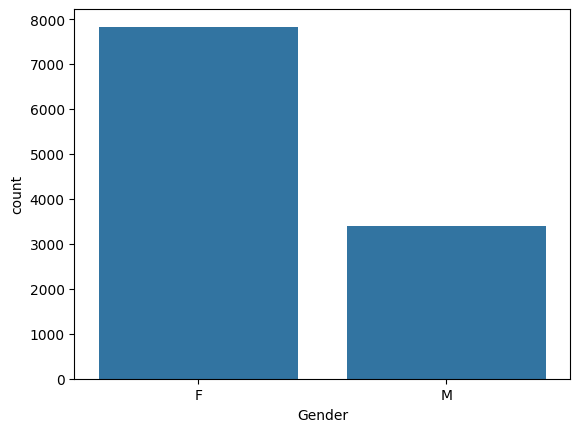

In [61]:
# Count of Males and Female customers
sns.countplot(x='Gender', data=df)

<Axes: xlabel='Gender', ylabel='Amount'>

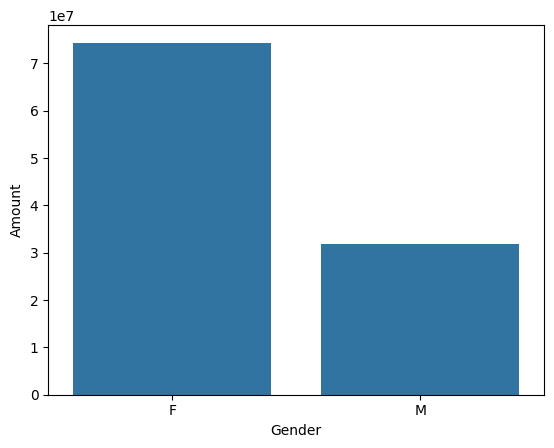

In [62]:
# Comparing sales by Gender
gender_sales = df.groupby('Gender')['Amount'].sum().reset_index()
gender_sales = gender_sales.sort_values(by="Amount", ascending=False)
sns.barplot(x='Gender',y='Amount', data=gender_sales)

*From the above graphs we can assume that most of the buyers are females and the purchasing power of females is greater to that of men*

### Age

<Axes: xlabel='Age Group', ylabel='count'>

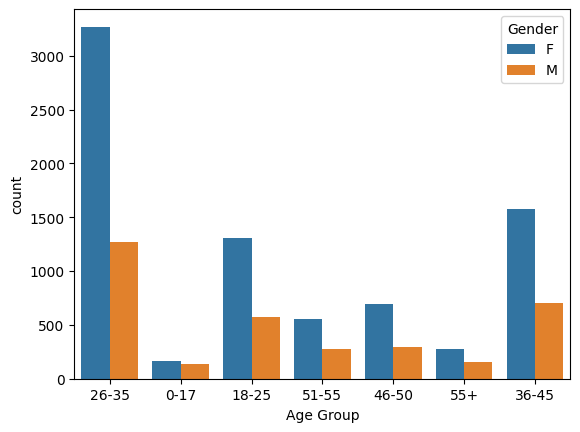

In [63]:
# Count of customers according to gender and age group
sns.countplot(data=df,x='Age Group',hue="Gender")

<Axes: xlabel='Age Group', ylabel='Amount'>

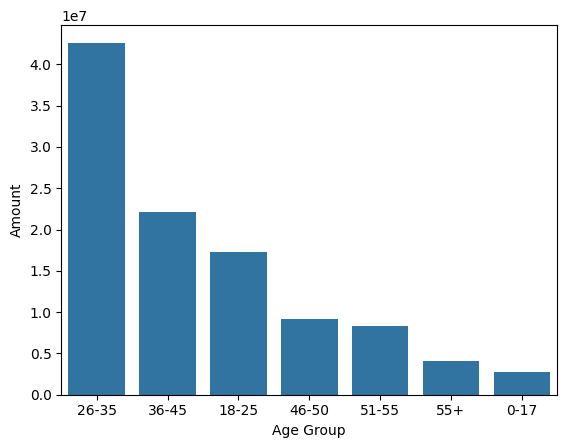

In [64]:
# Amount spent by customers according to age group
sales_age_group = df.groupby('Age Group')['Amount'].sum().reset_index()
sales_age_group = sales_age_group.sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group', y = 'Amount', data=sales_age_group)

*From the above graphs we can see that most of the buyers are of the age group between 26-35 yrs female*

### States

<Axes: xlabel='Orders', ylabel='State'>

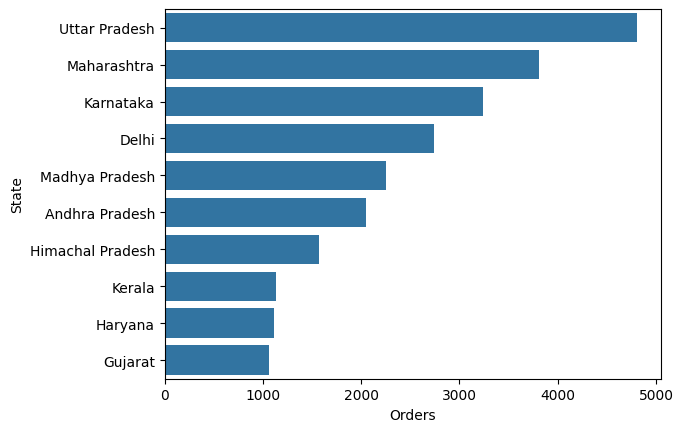

In [65]:
#Total number of orders from top 10 states
states_sales = df.groupby('State')['Orders'].sum().reset_index()
states_sales = states_sales.sort_values(by="Orders", ascending=False).head(10)
sns.barplot(data=states_sales, x="Orders", y="State")

<Axes: xlabel='Amount', ylabel='State'>

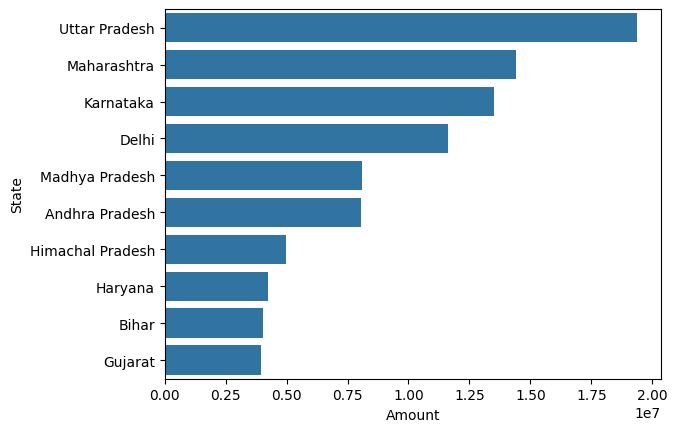

In [66]:
#Total amount spent by top 10 States
states_amt = df.groupby('State')['Amount'].sum().reset_index()
states_amt = states_amt.sort_values(by="Amount", ascending=False).head(10)
sns.barplot(data= states_amt, x="Amount", y="State")

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

### Marital Status

<Axes: xlabel='Marital_Status', ylabel='count'>

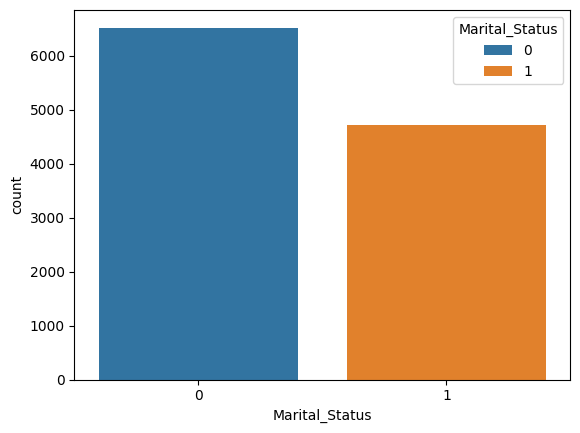

In [67]:
# Count of Married Customers, Blue are married and Orange are un-married
sns.countplot(data=df, x="Marital_Status",hue="Marital_Status")

<Axes: xlabel='Marital_Status', ylabel='Amount'>

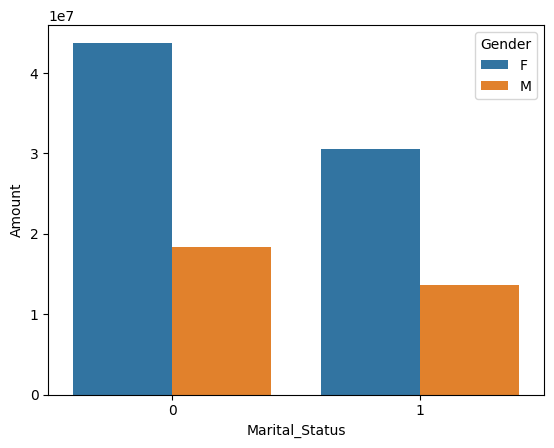

In [68]:
#Comparing the amount spent by married and un-married customers
marital_sales = df.groupby(['Marital_Status','Gender'])['Amount'].sum().reset_index()
marital_sales = marital_sales.sort_values(by="Amount",ascending=False)
sns.barplot(data = marital_sales, x = 'Marital_Status',y= 'Amount', hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

<Axes: xlabel='count', ylabel='Occupation'>

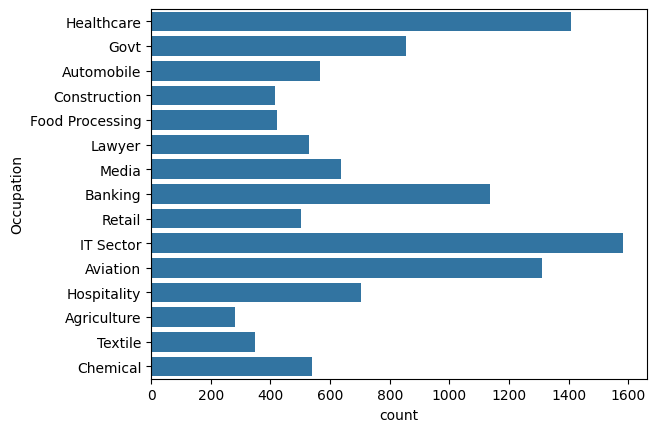

In [69]:
# Count of occupation of customers
sns.countplot(data=df, y='Occupation')

<Axes: xlabel='Amount', ylabel='Occupation'>

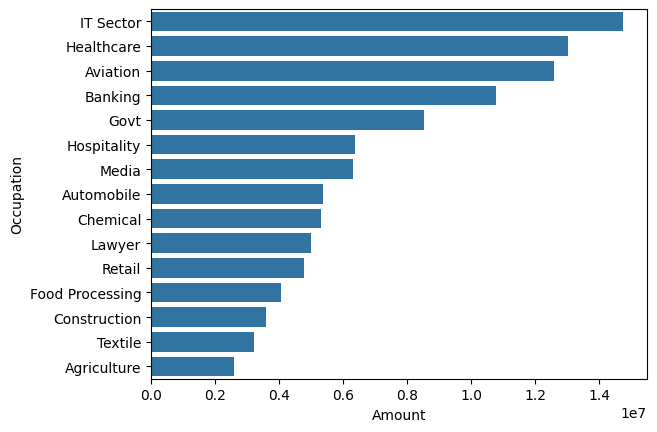

In [70]:
#Comparing the amount spent by customers according to their occupation
occu_sales = df.groupby('Occupation')['Amount'].sum().reset_index()
occu_sales = occu_sales.sort_values(by="Amount", ascending=False)
sns.barplot(data=occu_sales, y='Occupation', x="Amount")

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

<Axes: xlabel='count', ylabel='Product_Category'>

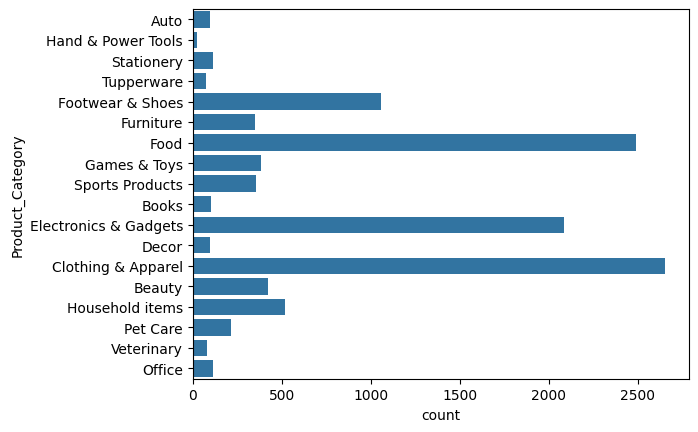

In [71]:
# Count of different product categories sold
sns.countplot(data = df, y = 'Product_Category')

<Axes: xlabel='Amount', ylabel='Product_Category'>

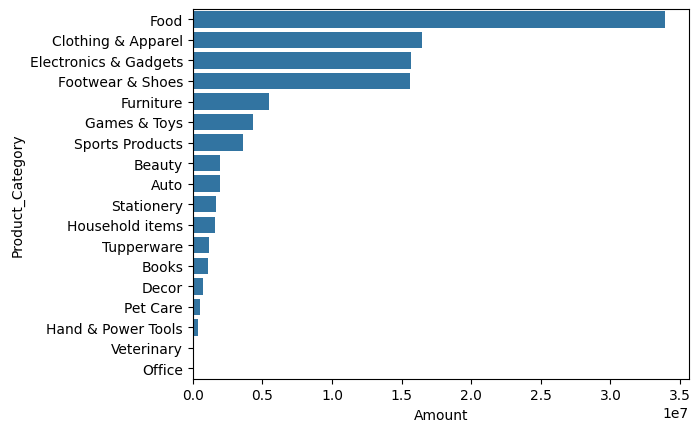

In [72]:
# Comparing Amount sold by different product categories
prodcat_sales = df.groupby('Product_Category')['Amount'].sum().reset_index()
prodcat_sales = prodcat_sales.sort_values(by="Amount",ascending=False)
sns.barplot(data = prodcat_sales, x = 'Amount',y= 'Product_Category')


*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Orders', ylabel='Product_ID'>

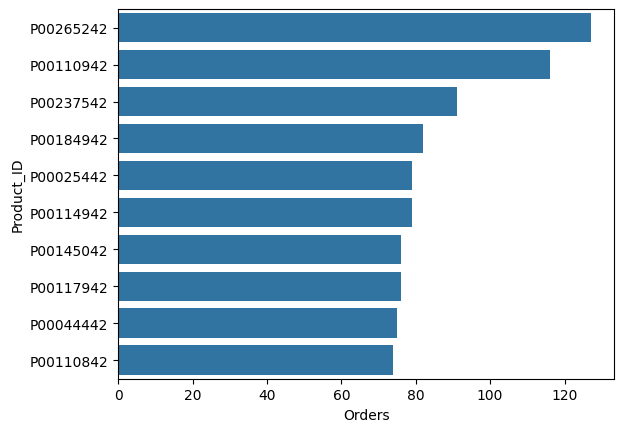

In [73]:
#The top 10 most sold Products
prodid_ord = df.groupby('Product_ID')['Orders'].sum().reset_index()
prodid_ord = prodid_ord.sort_values(by='Orders',ascending=False).head(10)
sns.barplot(data = prodid_ord, y = 'Product_ID', x= 'Orders')

## Conclusion:

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category during diwali*